In [174]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [175]:
df = pd.read_csv(r"C:\Users\nstow\Desktop\Python\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv")

In [176]:
## remove unuable rows

df = df.iloc[4:]
df = df.iloc[:, :-1]
df = df[:-3]
df.columns = ['city', 'population', 'violent crime', 'murder', 'revised rape', 'legacy rape', 'robbery', 'assault',\
              'property crime', 'burglary', 'theft', 'motor vehicle theft', 'arson']

In [178]:
## check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 4 to 351
Data columns (total 13 columns):
city                   348 non-null object
population             348 non-null object
violent crime          348 non-null object
murder                 348 non-null object
revised rape           0 non-null object
legacy rape            348 non-null object
robbery                348 non-null object
assault                348 non-null object
property crime         348 non-null object
burglary               348 non-null object
theft                  348 non-null object
motor vehicle theft    348 non-null object
arson                  187 non-null object
dtypes: object(13)
memory usage: 17.7+ KB


In [179]:
## remove commas so object values can be converted to numeric values
df['population'] = df['population'].str.replace(',', '')
df['violent crime'] = df['violent crime'].str.replace(',', '')
df['murder'] = df['murder'].str.replace(',', '')
df['legacy rape'] = df['legacy rape'].str.replace(',', '')
df['robbery'] = df['robbery'].str.replace(',', '')
df['assault'] = df['assault'].str.replace(',', '')
df['property crime'] = df['property crime'].str.replace(',', '')
df['burglary'] = df['burglary'].str.replace(',', '')
df['theft'] = df['theft'].str.replace(',', '')
df['motor vehicle theft'] = df['motor vehicle theft'].str.replace(',', '')
df['arson'] = df['arson'].str.replace(',', '')

In [180]:
## covert to numeric values
df['population'] = pd.to_numeric(df['population'])
df['violent crime'] = pd.to_numeric(df['violent crime'])
df['murder'] = pd.to_numeric(df['murder'])
df['legacy rape'] = pd.to_numeric(df['legacy rape'])
df['robbery'] = pd.to_numeric(df['robbery'])
df['assault'] = pd.to_numeric(df['assault'])
df['property crime'] = pd.to_numeric(df['property crime'])
df['burglary'] = pd.to_numeric(df['burglary'])
df['theft'] = pd.to_numeric(df['theft'])
df['motor vehicle theft'] = pd.to_numeric(df['motor vehicle theft'])
df['arson'] = pd.to_numeric(df['arson'])

In [181]:
## remove revised rape (empty column) and fill in empty values in arson
df = df.drop(columns=['revised rape'])
df['arson'] = df['arson'].fillna(0)

In [182]:
## check for accuracy of transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 4 to 351
Data columns (total 12 columns):
city                   348 non-null object
population             348 non-null int64
violent crime          348 non-null int64
murder                 348 non-null int64
legacy rape            348 non-null int64
robbery                348 non-null int64
assault                348 non-null int64
property crime         348 non-null int64
burglary               348 non-null int64
theft                  348 non-null int64
motor vehicle theft    348 non-null int64
arson                  348 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 31.3+ KB


## Check for Linear Relationship
We will check to make sure that the variables are related linearly.

Text(0.5, 1.0, 'Property Crime vs Arson')

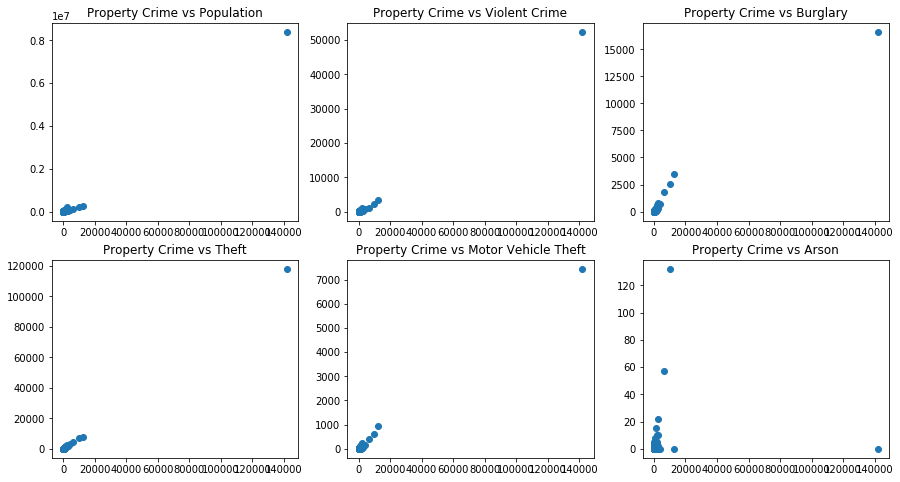

In [183]:
## plot the relationship between property crime and other variables
plt.figure(figsize = (15,8))

plt.subplot(2,3,1)
plt.scatter(df['property crime'], df['population'])
plt.title('Property Crime vs Population')

plt.subplot(2,3,2)
plt.scatter(df['property crime'], df['violent crime'])
plt.title('Property Crime vs Violent Crime')

plt.subplot(2,3,3)
plt.scatter(df['property crime'], df['burglary'])
plt.title('Property Crime vs Burglary')

plt.subplot(2,3,4)
plt.scatter(df['property crime'], df['theft'])
plt.title('Property Crime vs Theft')

plt.subplot(2,3,5)
plt.scatter(df['property crime'], df['motor vehicle theft'])
plt.title('Property Crime vs Motor Vehicle Theft')

plt.subplot(2,3,6)
plt.scatter(df['property crime'], df['arson'])
plt.title('Property Crime vs Arson')

### Burglary and Theft have the most linear relationship so we will continue with those as our features for this Linear Regression

## Check for Variance in Regression

In [184]:
## perform linear Regression
regr = linear_model.LinearRegression()
Y = df['property crime'].values.reshape(-1, 1)
X = df[['burglary', 'theft']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.15045484 1.04182263]]

Intercept: 
 [-8.74358437]

R-squared:
0.9999940266291274


### The R-squared value from this model is very high and explains almost all of the variance. We will check a few more things before deciding if this is the equation that we should use for our Linear Regression model

## Checking for multivariate normality

In [185]:
## calculate the difference between the actual data and the predicted data
predicted = regr.predict(X).ravel()
actual = df['property crime']
residual = actual - predicted

Text(0, 0.5, 'Count')

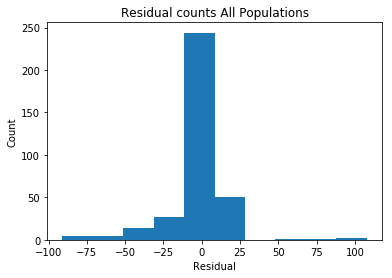

In [186]:
plt.hist(residual)
plt.title('Residual counts All Populations')
plt.xlabel('Residual')
plt.ylabel('Count')

The relationship is mostly normal with a small difference between the two tails

## Check for low multicollinearity

,burglary,theft
burglary,1.000,0.983
theft,0.983,1.000


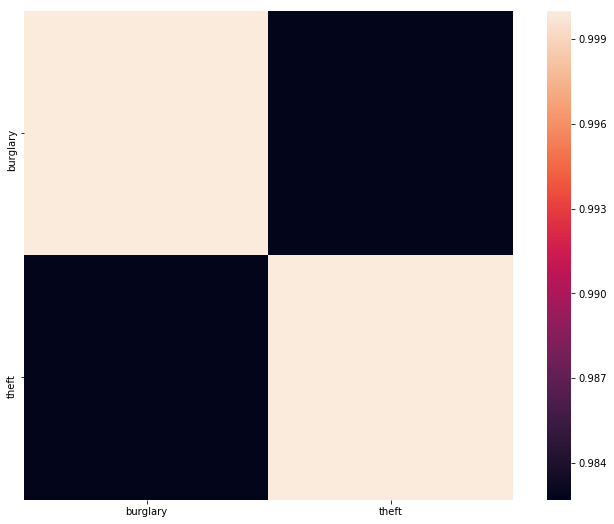

In [187]:
## Check the correlation between our two variables
correlation_matrix = X.corr()
display(correlation_matrix)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(correlation_matrix, square=True)
plt.show()

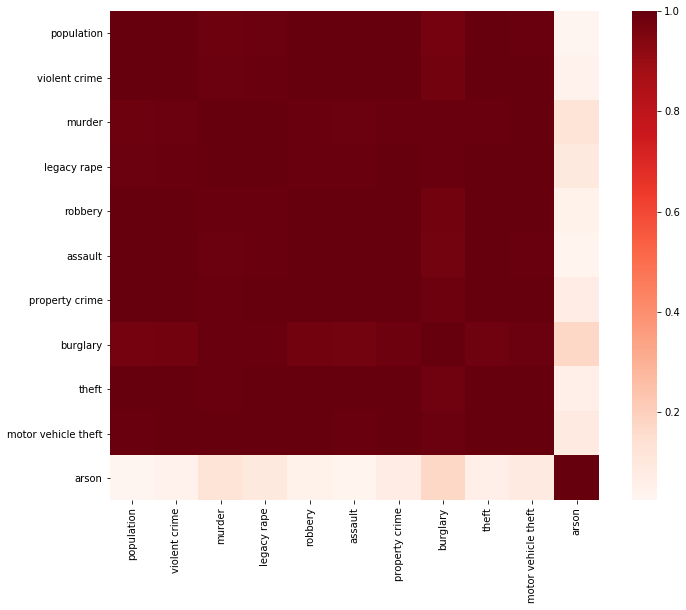

In [188]:
## check for low correlation in any of the other variables
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True, cmap="Reds")
plt.show()

### Since all of the varibles are highly correlated, except for arson, we will attempt to create a more linear relationship between arson and property crimes so we can use it in our linear regression

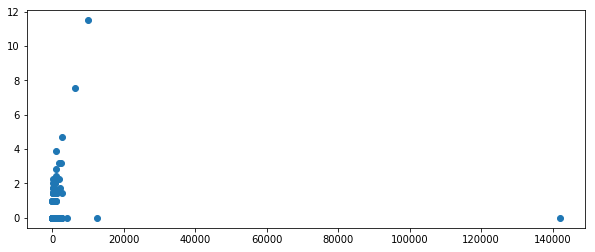

In [189]:
## create a new column with the square root of the arson data to create a more linear relationship
plt.figure(figsize = (10,4))

df['arsonSqrt'] = np.sqrt(df['arson'])

plt.scatter(df['property crime'], df['arsonSqrt'])

### The square root of the Arson data comes closest to a linear relationship so we will include this in our linear regression

In [190]:
## preform linear regression
regr = linear_model.LinearRegression()
Y1 = df['property crime'].values.reshape(-1, 1)
X1 = df[['arsonSqrt']]
regr.fit(X1, Y1)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X1, Y1))


Coefficients: 
 [[484.63506285]]

Intercept: 
 [652.09896053]

R-squared:
0.0037003136071933618


### The R-squared value for this is very low so we will try including the other variables

## Check for homoscedasticity

Text(0, 0.5, 'Count')

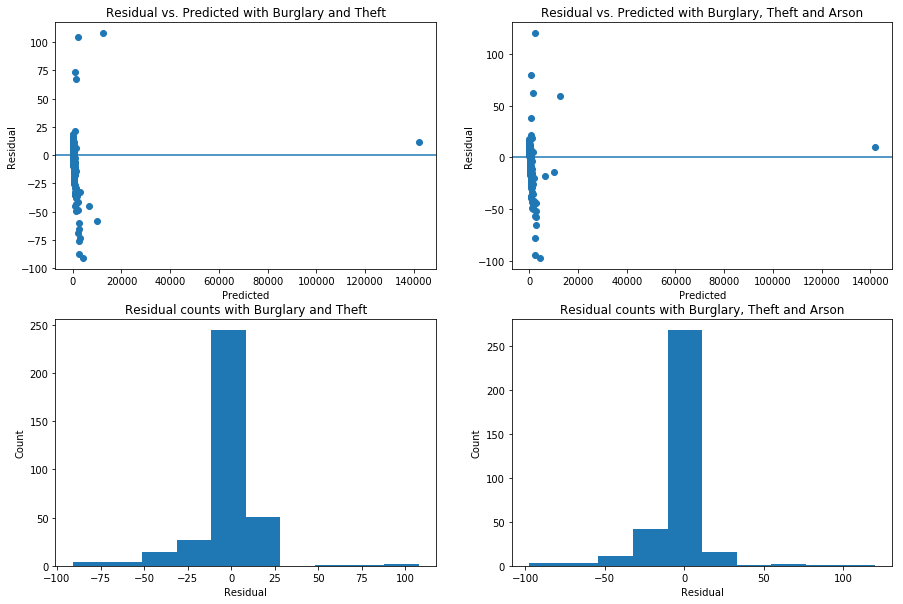

In [214]:
##compare the homoscedasticity and normality of theft and burglary to that of theft, burglary and the square root of arson

regr = linear_model.LinearRegression()
Y = df['property crime'].values.reshape(-1, 1)
X = df[['burglary', 'theft']]
regr.fit(X, Y)

predicted = regr.predict(X).ravel()
actual = df['property crime']
residual = actual - predicted

regr = linear_model.LinearRegression()
Y2 = df['property crime'].values.reshape(-1, 1)
X2 = df[['burglary', 'theft', 'arsonSqrt']]
regr.fit(X2, Y2)

predicted1 = regr.predict(X2).ravel()
actual1 = df['property crime']
residual1 = actual1 - predicted1

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with Burglary and Theft')

plt.subplot(2,2,2)
plt.scatter(predicted1, residual1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with Burglary, Theft and Arson')

plt.subplot(2,2,3)
plt.hist(residual)
plt.title('Residual counts with Burglary and Theft')
plt.xlabel('Residual')
plt.ylabel('Count')

plt.subplot(2,2,4)
plt.hist(residual1)
plt.title('Residual counts with Burglary, Theft and Arson')
plt.xlabel('Residual')
plt.ylabel('Count')

### Both models have about the same homoscedasticity, but Burglary, Theft and Arson has is more normal. We will double check the R- square values to be sure both models account similarily for variance

In [211]:
## perform linear Regression
regr = linear_model.LinearRegression()
Y = df['property crime'].values.reshape(-1, 1)
X = df[['burglary', 'theft']]
regr.fit(X, Y)

print('Buglary and Theft')
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

regr = linear_model.LinearRegression()
Y2 = df['property crime'].values.reshape(-1, 1)
X2 = df[['burglary', 'theft', 'arsonSqrt']]
regr.fit(X2, Y2)

print('\nBurglary, Theft and Arson')
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))

Buglary and Theft

Coefficients: 
 [[1.15045484 1.04182263]]

Intercept: 
 [-8.74358437]

R-squared:
0.9999940266291274

Burglary, Theft and Arson

Coefficients: 
 [[ 1.17055637  1.03899317 -6.83574522]]

Intercept: 
 [-7.36515634]

R-squared:
0.9999945590103726


The R-squared value for burglary and theft alone is slightly lower than the value that includes arson and the data is more normal for the set including arson, so for our linear regression model we will use the equation:

### property crime  = burglary + theft  + √arson